# Project has the following stages:

1.   Collecting Images with Expressions
1.   Detecting Faces in the Images and saving them
2.   Training our classifier on the Faces
1.   Recognition of expression in new Images


**Clone Repository**

In [1]:
!git clone https://github.com/Ratun011/Emotion_Detection.git

Cloning into 'Emotion_Detection'...
remote: Enumerating objects: 13749, done.
remote: Total 13749 (delta 0), reused 0 (delta 0), pack-reused 13749
Receiving objects: 100% (13749/13749), 235.27 MiB | 37.37 MiB/s, done.
Resolving deltas: 100% (139/139), done.
Checking out files: 100% (13726/13726), done.


**Creating necessary directories**

In [2]:
%cd Emotion_Detection/
%mkdir -p data_set/{anger,happy,neutral,sad,surprise}
%mkdir dataset
%mkdir trainer

/content/Emotion_Detection


# **Step 1 : Creating Data Set of Faces**

In [3]:
import cv2

def CreatingDataSet(expression,face_id):

  with open(expression+'.txt','r') as f:
      images = [line.strip() for line in f]
  for image in images:
      loadedImage = cv2.imread("images/"+image)
      cv2.imwrite("data_set/"+expression+"/"+image,loadedImage)
  print("Load all images of "+expression+" done")
  print()



  face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

  # For each Emotion, enter one numeric face id
  #face_id = input('\n Enter Emotion id for '+expression+' end press <return> ==>  ')

  count = 0

  for image in images:
      img = cv2.imread("data_set/"+expression+"/"+image)
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      faces = face_detector.detectMultiScale(gray, 1.3, 5)

      for (x,y,w,h) in faces:

          cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
          count += 1

          # Save the captured image into the datasets folder
          cv2.imwrite("dataset/." + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])

  print("\n Done creating face data for "+expression)
  print("-------------------------------------------")
  print()

In [4]:
exp=['anger', 'happy', 'neutral', 'sad', 'surprise']

for express in exp:
  CreatingDataSet(express,exp.index(express))
print('-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-')
print("Data set created succesfully....")


Load all images of anger done


 Done creating face data for anger
-------------------------------------------

Load all images of happy done


 Done creating face data for happy
-------------------------------------------

Load all images of neutral done


 Done creating face data for neutral
-------------------------------------------

Load all images of sad done


 Done creating face data for sad
-------------------------------------------

Load all images of surprise done


 Done creating face data for surprise
-------------------------------------------

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
Data set created succesfully....


# **Step 2: Training Images**

In [5]:
from google.colab import files
import cv2
import numpy as np
from PIL import Image
import os



# Path for face image database
path = 'dataset'

recognizer = cv2.face.LBPHFaceRecognizer_create()
detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml");

# function to get the images and label data
def getImagesAndLabels(path):

    imagePaths = [os.path.join(path,f) for f in os.listdir(path)]     
    faceSamples=[]
    ids = []

    for imagePath in imagePaths:

        PIL_img = Image.open(imagePath).convert('L') # convert it to grayscale
        img_numpy = np.array(PIL_img,'uint8')

        id = int(os.path.split(imagePath)[-1].split(".")[1])
        faces = detector.detectMultiScale(img_numpy)

        for (x,y,w,h) in faces:
            faceSamples.append(img_numpy[y:y+h,x:x+w])
            ids.append(id)

    return faceSamples,ids

print ("\n [INFO] Training faces....")
faces,ids = getImagesAndLabels(path)
recognizer.train(faces, np.array(ids))

# Save the model into trainer/trainer.yml
recognizer.write('trainer/trainer.yml') 

# Print the numer of Emotions trained and end program
print("\n [INFO] {0} Emotions trained. Exiting Program".format(len(np.unique(ids))))
print()


 [INFO] Training faces....

 [INFO] 5 Emotions trained. Exiting Program



#Downloading the trained model

In [ ]:
print("Downloading the trained model.-.-.-.-.-.-")
files.download('trainer/trainer.yml')
print("Dwonload Complited.....")

# **Step 3 : Recognition (Testing)**

In [10]:
import cv2
import numpy as np
import os 

recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainer/trainer.yml')
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath);

font = cv2.FONT_HERSHEY_SIMPLEX

#iniciate id counter
id = 0

# Emotions related to ids: example ==> Anger: id=0,  etc
names = ['Anger', 'Happy', 'Neutral', 'Sad', 'Surprise', 'Unknown']
 

# Initialize and start realtime video capture
cam = cv2.VideoCapture(0)
cam.set(3, 640) # set video widht
cam.set(4, 480) # set video height

# Define min window size to be recognized as a face
minW = 0.1*cam.get(3)
minH = 0.1*cam.get(4)

# ret, img =cam.read()
img = cv2.imread("1.jpg")
# img = cv2.flip(img, -1) # Flip vertically

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale( 
    gray,
    scaleFactor = 1.2,
    minNeighbors = 5,
    minSize = (int(minW), int(minH)),
    )

for(x,y,w,h) in faces:

    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

    id, confidence = recognizer.predict(gray[y:y+h,x:x+w])

    # Check if confidence is less them 100 ==> "0" is perfect match 
    if (confidence < 100):
        id = names[id]
        confidence = "  {0}%".format(round(100 - confidence+15))
    else:
        id = "unknown"
        confidence = "  {0}%".format(round(100 - confidence+15))
    
    cv2.putText(img, str(id), (x+5,y-5), font, 1, (255,255,255), 2)
    cv2.putText(img, str(confidence), (x+5,y+h-5), font, 1, (255,255,0), 1)  

cv2.imwrite("1_2.jpg",img) 

print("\n [INFO] Done detecting and Image is saved")
cam.release()
cv2.destroyAllWindows()


 [INFO] Done detecting and Image is saved


# **Display Detected Images**

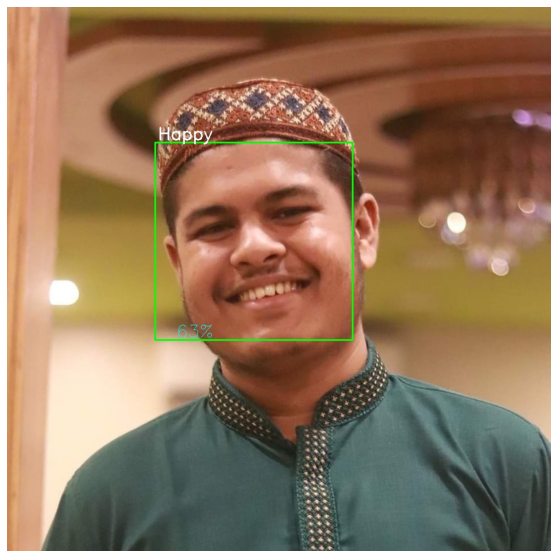

In [11]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("1_2.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()